In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(16,9)
# plt.style.use("ggplpt")
df = pd.read_csv("xclara.csv")
df.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


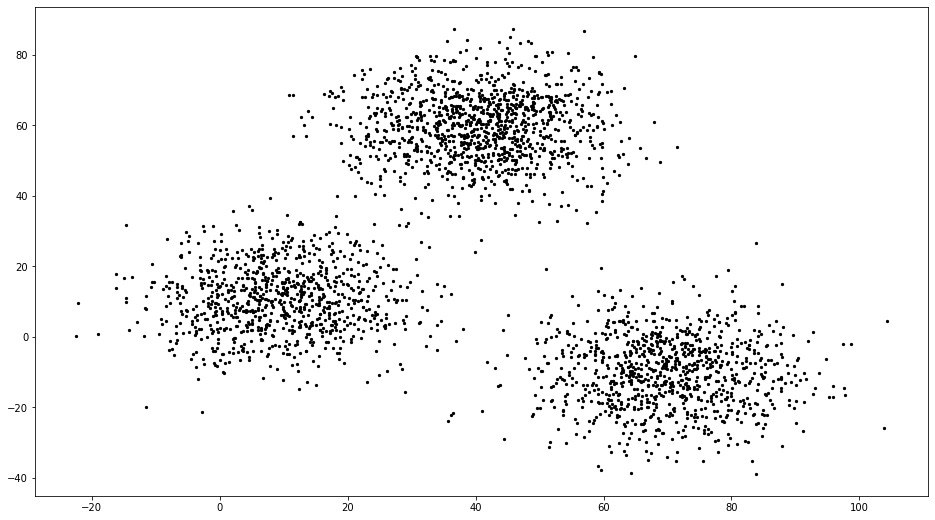

In [2]:
f1 = df["V1"].values
f2 = df["V2"].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1,f2,c="black",s=5)
k = 3

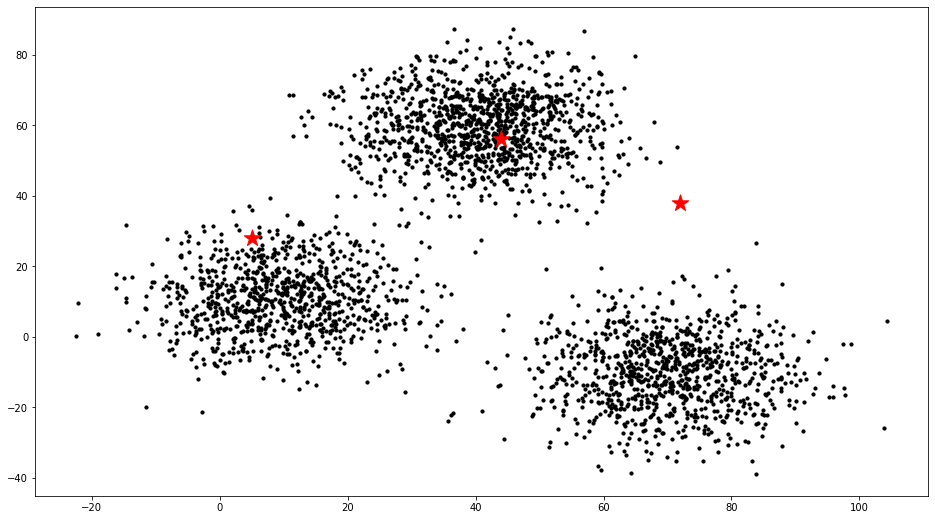

In [3]:
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)
C_x = np.random.randint(0,max(f1)-20,size=k)
C_y = np.random.randint(0,max(f2)-20,size=k)
C = np.array(list(zip(C_x,C_y)),dtype=np.float64)
# C
plt.scatter(f1,f2,c="black",s=10)
plt.scatter(C_x,C_y,c="red",s=300,marker="*")

[[44. 56.]
 [72. 38.]
 [ 5. 28.]]
[[40.3655604  60.18182   ]
 [69.93010339 -8.53305832]
 [ 9.86314486 10.72155261]]
[[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]


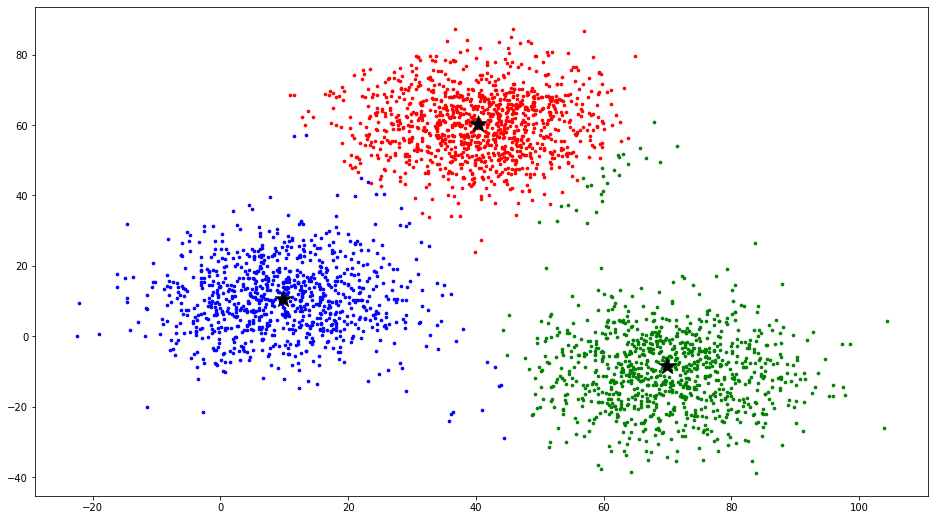

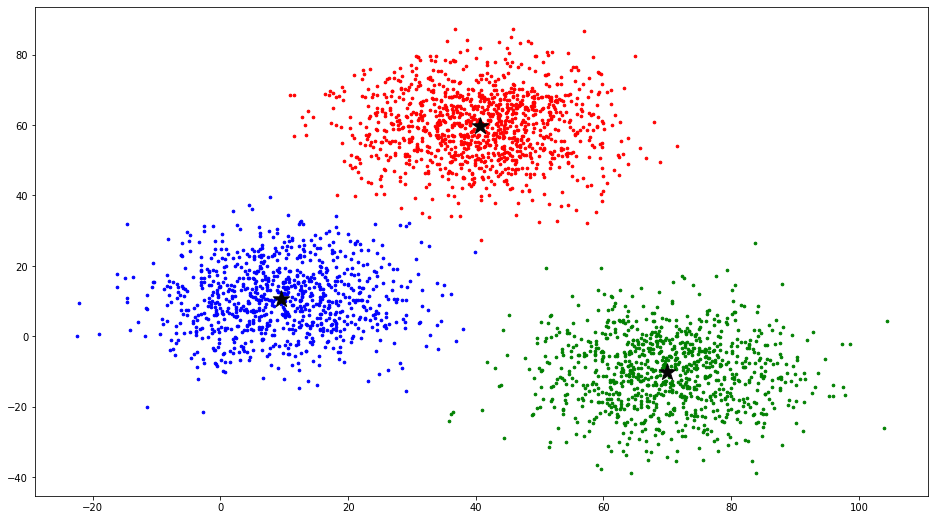

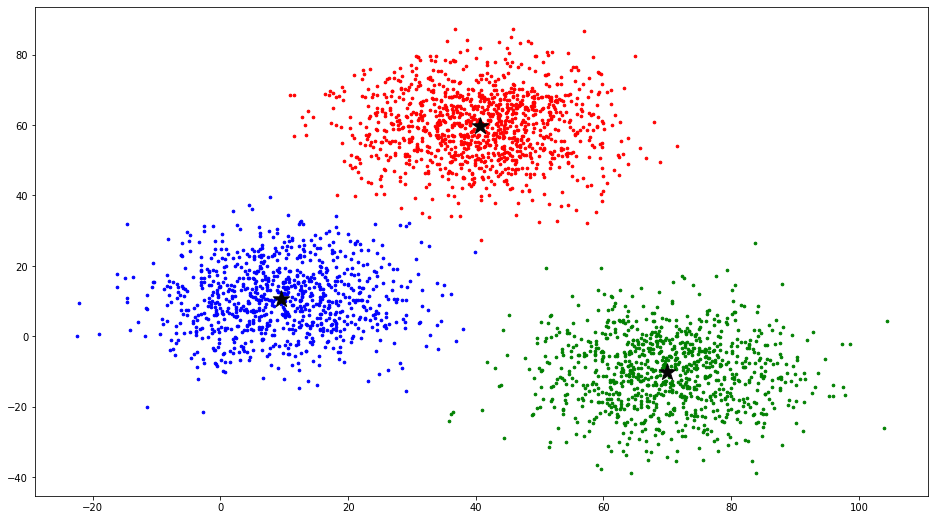

In [4]:
from copy import deepcopy
c_old = np.zeros(C.shape)
cls = np.zeros(len(X))
error = dist(C,c_old,None)
while error !=0:
    print(C)
    for i in range(len(X)):
        d1 = dist(X[i],C)
        c1 = np.argmin(d1)
        cls[i] = c1
    c_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if cls[j] == i]
        C[i] = np.mean(points,axis=0)
    error = dist(C,c_old,None)
    colors = ['r','g','b','y','c','m']
    fig,ax = plt.subplots()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if cls[j] == i ])
        ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
    ax.scatter(C[:,0],C[:,1], marker="*", s=300, c="#050505")

[[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]


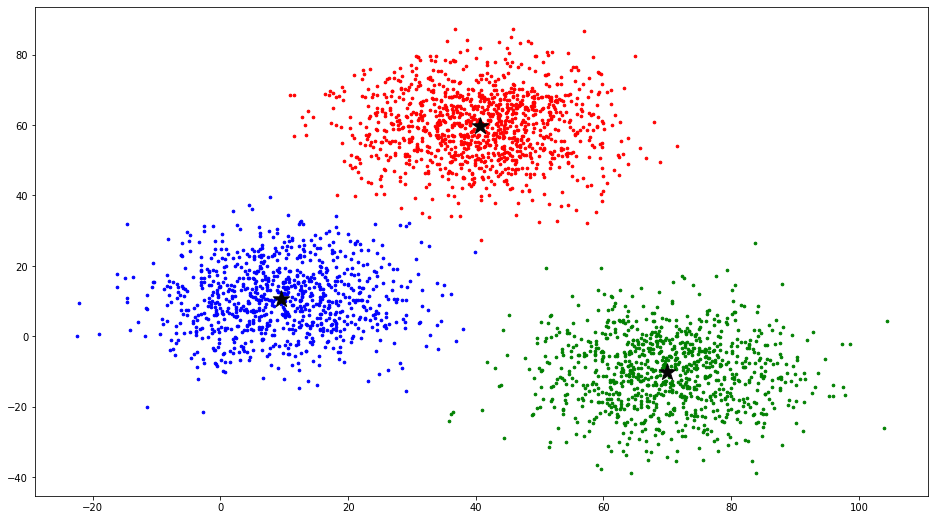

In [8]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(16,9)
df = pd.read_csv("xclara.csv")
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(df)
cls = kmeans.predict(df)
C = kmeans.cluster_centers_
print(C)
colors = ['r','g','b','y','c','m']
fig,ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if cls[j] == i ])
    ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
ax.scatter(C[:,0],C[:,1], marker="*", s=300, c="#050505")